In [2]:
def lmap(min1, max1, val, min2, max2):
    return min2 + (max2 - min2)/(max1 - min1) * (val - min1)

In [3]:
from matplotlib import pyplot as plt
from PIL import Image
import numpy as np
from astropy.io import fits
import pandas as pd
from IPython.display import Audio

# Reading Image

## PIL

In [4]:
img = Image.open("images/L3a/2178m621_ac51/1.fits")

In [5]:
img_data = np.array(img)
height, width = img_data.shape
#height, width  = img_data.shape

## FITS using astropy

In [6]:
from astropy.utils.data import get_pkg_data_filename

In [7]:
image_file = get_pkg_data_filename("images/m81/1.fits")

In [8]:
fits.info(image_file)

Filename: images/m81/1.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      71   (437, 438)   float32   


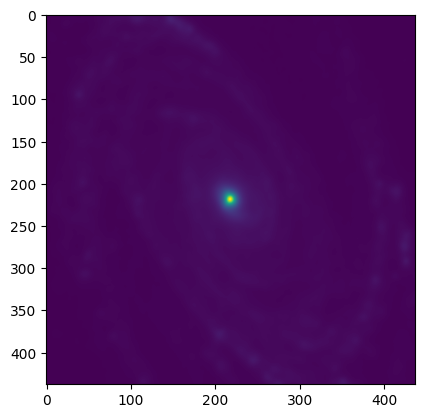

In [9]:
image_data = fits.getdata(image_file, ext = 0)
plt.imshow(image_data)
plt.imsave("dd.png", image_data)

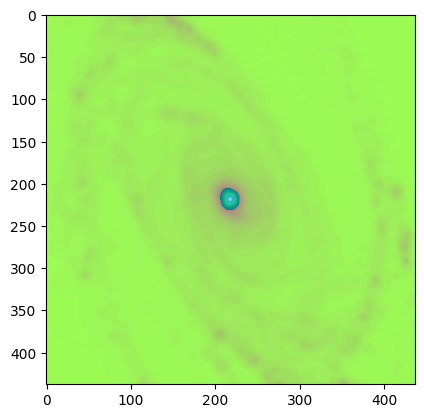

In [10]:
import cv2

img = Image.open("dd.png")
imghsv = cv2.cvtColor(np.array(img), cv2.COLOR_BGR2HSV)
plt.imshow(imghsv, cmap = 'viridis')

# TIFF using GDAL

In [2]:
from osgeo import gdal

In [4]:
gdal.Open("images/bhuvan/2.tif")

Warning 1: images/bhuvan/2.tif: TIFFReadDirectory:Sum of Photometric type-related color channels and ExtraSamples doesn't match SamplesPerPixel. Defining non-color channels as ExtraSamples.


<osgeo.gdal.Dataset; proxy of <Swig Object of type 'GDALDatasetShadow *' at 0x7f92d458ab50> >

# Traverse the Image

In [11]:
hues = []
height, width, nlayers = imghsv.shape

In [12]:
for i in range(height):
    for j in range(width):
        hue = imghsv[i][j][0]
        hues.append(hue)
hues = pd.DataFrame(hues, columns= ["hues"])
hues

hues
0        156
1        156
2        156
3        156
4        156
...      ...
191401   156
191402   156
191403   156
191404   156
191405   156

[191406 rows x 1 columns]

In [13]:
#Define frequencies that make up A-Harmonic Minor Scale
scale_freqs = [220.00, 246.94 ,261.63, 293.66, 329.63, 349.23, 415.30] 
def hue2freq(h,scale_freqs):
    thresholds = [26 , 52 , 78 , 104,  128 , 154 , 180]
    note = scale_freqs[0]
    if (h <= thresholds[0]):
         note = scale_freqs[0]
    elif (h > thresholds[0]) & (h <= thresholds[1]):
        note = scale_freqs[1]
    elif (h > thresholds[1]) & (h <= thresholds[2]):
        note = scale_freqs[2]
    elif (h > thresholds[2]) & (h <= thresholds[3]):
        note = scale_freqs[3]
    elif (h > thresholds[3]) & (h <= thresholds[4]):    
        note = scale_freqs[4]
    elif (h > thresholds[4]) & (h <= thresholds[5]):
        note = scale_freqs[5]
    elif (h > thresholds[5]) & (h <= thresholds[6]):
        note = scale_freqs[6]
    else:
        note = scale_freqs[0]
    return note

In [14]:
hues['notes'] = hues.apply(lambda row : hue2freq(row['hues'],scale_freqs), axis = 1)     

In [15]:
hues

hues  notes
0        156  415.3
1        156  415.3
2        156  415.3
3        156  415.3
4        156  415.3
...      ...    ...
191401   156  415.3
191402   156  415.3
191403   156  415.3
191404   156  415.3
191405   156  415.3

[191406 rows x 2 columns]

In [16]:
frequencies = hues['notes'].to_numpy()

In [17]:
song = np.array([])
sr = 22050
T = 0.1
t = np.linspace(0, T, int(T * sr), endpoint = False)
npixels = 1000

amp = 1
for i in range(npixels):
    val = frequencies[i]
    note = amp * np.sin(2 * np.pi * val * t)
    song = np.concatenate([song, note])

In [18]:
Audio(song, rate = sr)

In [19]:
def get_piano_notes():   
    # White keys are in Uppercase and black keys (sharps) are in lowercase
    octave = ['C', 'c', 'D', 'd', 'E', 'F', 'f', 'G', 'g', 'A', 'a', 'B'] 
    base_freq = 440 #Frequency of Note A4
    keys = np.array([x+str(y) for y in range(0,9) for x in octave])
    # Trim to standard 88 keys
    start = np.where(keys == 'A0')[0][0]
    end = np.where(keys == 'C8')[0][0]
    keys = keys[start:end+1]
    
    note_freqs = dict(zip(keys, [2**((n+1-49)/12)*base_freq for n in range(len(keys))]))
    note_freqs[''] = 0.0 # stop
    return note_freqs

In [20]:
note_freqs = get_piano_notes()
scale_intervals = ['A','a','B','C','c','D','d','E','F','f','G','g']

In [21]:
#Find index of desired key
index = scale_intervals.index('a')

#Redefine scale interval so that scale intervals begins with whichKey
new_scale = scale_intervals[index:12] + scale_intervals[:index]